1. Imports the necessary libraries

*   tensorflow and keras for building and training neural networks.
*   numpy for numerical operations.
*   matplotlib.pyplot for data visualization

    <h2>Prints the current version of TensorFlow. tf.__version__</h2>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print ("Done with library declaration. Current version of Tensorflow is :", tf.__version__)

Done with library declaration. Current version of Tensorflow is : 2.14.0


2. Loads the Fashion MNIST dataset using the Keras API.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

3. The dataset consists of images of fashion items, divided into training and testing sets.<br>

Creates a list of class names corresponding to the labels in the dataset. This list is used for class labels.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


4. Displays the first training image from the dataset.

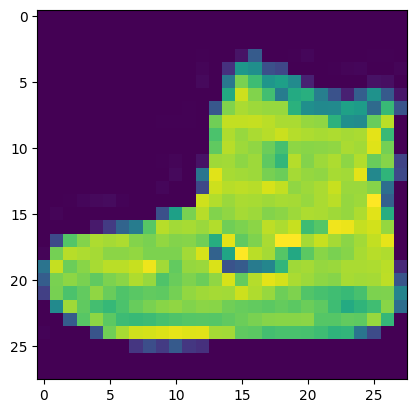

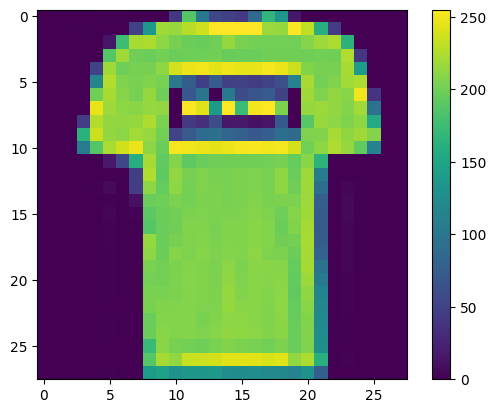

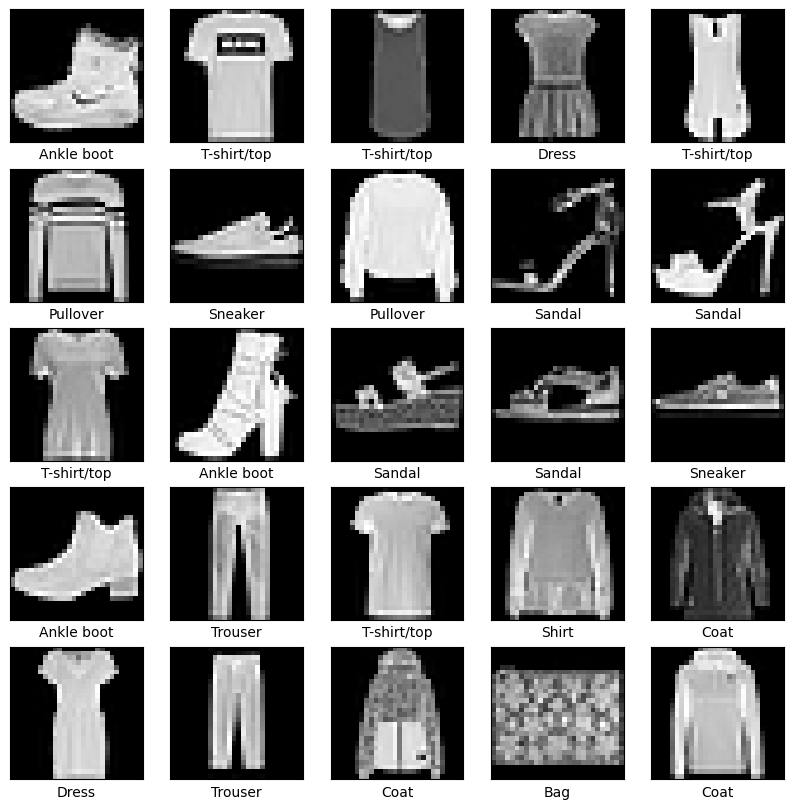

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Display a 5x5 grid of images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

6. Display a 5x5 Grid of Images with Labels<br>
Creates a 5x5 grid of training images with corresponding class labels.
Each subplot in the grid shows an image along with its label.

Normalizes pixel values of images to be between 0 and 1. This standardizes the data, making it easier for the neural network to learn.

train_images = train_images / 255.0
test_images = test_images / 255.0


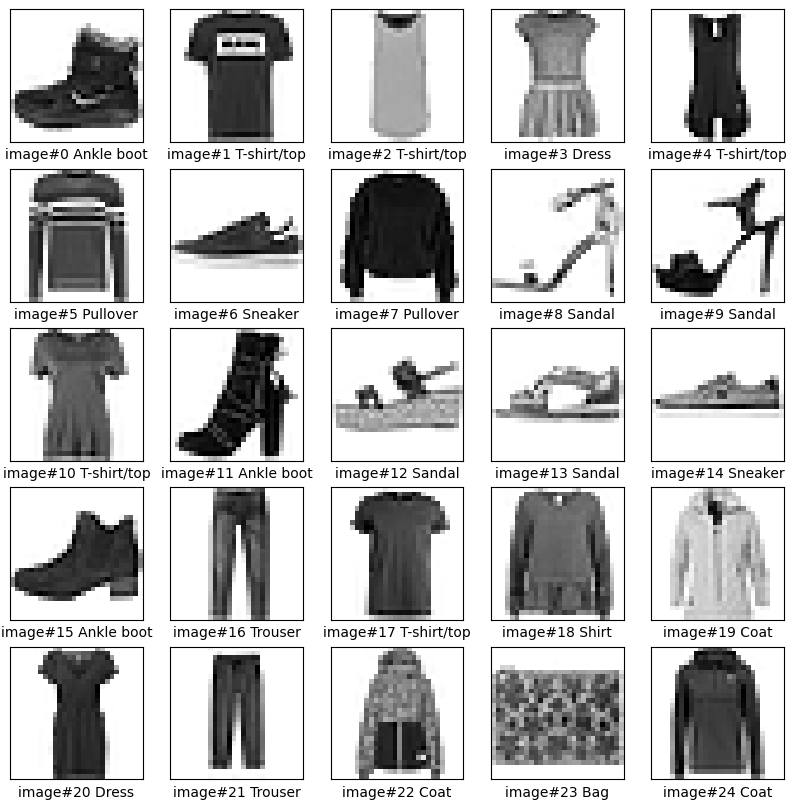

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel("image#"+str(i)+" "+class_names[train_labels[i]])
plt.show()

7. Build the Neural Network Model

*   Flatten: Converts the 28x28 input images into a flat vector.
*   Three Dense layers with ReLU activation: Intermediate layers with 128 neurons each.(Arbitrary)
*   Output Dense layer with 10 neurons and softmax activation: Produces probabilities for each class.

model.summary()
Prints a summary of the neural network model, showing the architecture and the number of parameters in each layer.

In [ ]:
model = tf.keras.Sequential()

layer_0 = tf.keras.layers.Flatten(input_shape=(28, 28))
layer_1 = tf.keras.layers.Dense(units=128, activation="relu")
layer_2 = tf.keras.layers.Dense(units=128, activation="relu")
layer_3 = tf.keras.layers.Dense(units=128, activation="relu")
layer_4 = tf.keras.layers.Dense(units=128, activation="relu")

layer_5 = tf.keras.layers.Dense(units=10, activation="softmax")

model.add(layer_0)
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 151306 (591.04 KB)
Trainable params: 15130

8. Compiles the model with the Adam optimizer, sparse categorical crossentropy loss (suitable for integer labels), and accuracy as the metric.
Compiles model to have this specific optimizer parameter to show it how accurate the model is.

In [ ]:
#model.compile(optimizer='adam',
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

9. Train the Neural Network here is epoch 20 or any can be arbitarary

In [ ]:
trained_model = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4988 - accuracy: 0.8184
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3729 - accuracy: 0.8634
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3390 - accuracy: 0.8745
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3146 - accuracy: 0.8826
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2977 - accuracy: 0.8886
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2847 - accuracy: 0.8937
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - accuracy: 0.8994
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2619 - accuracy: 0.9014
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2523 - accuracy: 0.9052
Epoch 10/20
1875/1875 [==============================] - 12s 7ms/step - l

10. Evaluate the Model on the Test Set
We evaulate how well our model is how accurate its prediction is to the test images and test label.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: {} Test Loss: {}'.format(test_acc * 100, test_loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.3801 - accuracy: 0.8909
Test accuracy: 89.09000158309937 Test Loss: 0.3801143765449524


11. Select a Single Test Image for Prediction We verify if a single image can be predicted and how accurate it is in real time to us.

(28, 28)
1/1 [==============================] - 0s 125ms/step
That is an Ankle boot


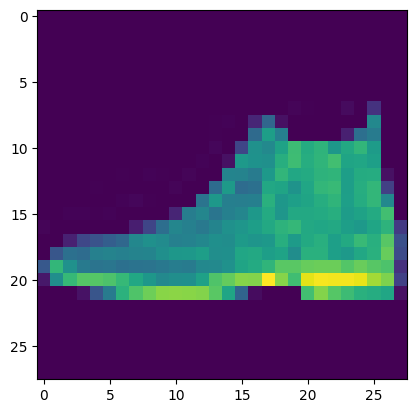

In [ ]:
imageIndex = 0

img = test_images[imageIndex]
print(img.shape)
img = np.expand_dims(img, 0)  # Fix typo in np.expand_dims
predictions_single = model.predict(img)
print("That is an " + class_names[np.argmax(predictions_single)])

plt.figure()
plt.imshow(test_images[imageIndex])
plt.show()

12. Plot the Training Loss Over Epochs This part we show how will our model improved it learning and how it got is values and how it adjusted it values to learn from the given data.

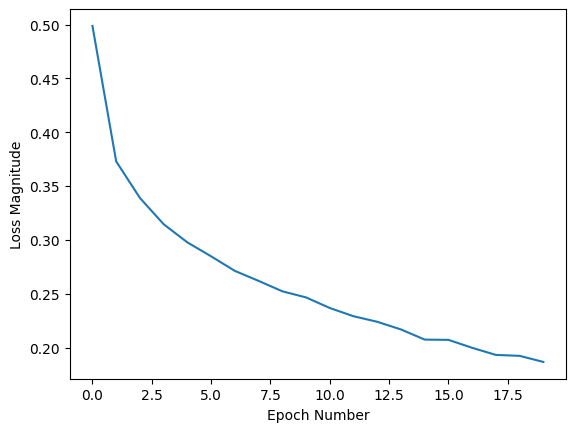

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(trained_model.history['loss'])
plt.show()